# My First Machine Learning Program

## Introduction
There is no better way to learn Machine Learning than to experiment with it! In this notebook you are step by step guided to do this. Challenge yourself in trying to understand the code and try to change the parameters.


First things first, we need a few libraries.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.20.3
pandas version: 1.3.4
scikit-learn version: 0.24.2
matplotlib version: 3.4.3


The algorithm you are going to use is known as k-NN (k-Nearest Neighbors) classification.

## The supervised learning classification steps: overview

This notebook implements all specific tasks in applying supervised machine learning techniques:

* Preparing the data, 
* Analysing and visualising the data, 
* Cleaning the data, 
* Selecting features,
* Dividing your data into a training and test set, 
* Training and applying the machine learning algorithm,
* Evaluating its results.

You will learn more on how to do each task in the weeks to come. For now, try to read the code and experiment with it.

## Step 1 Preparing the data
The first step is to get the data. There are a lot of prepared datasets available on the internet. We've selected popular small dataset for you that are suitable for a classification. 
* Iris dataset (150 entries of 4 input features and 1 output label) 


### Downloading

In [2]:
df_iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

### Exploring the iris dataset

In [3]:
df_iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
print('Iris dataset shape: {}'.format(df_iris.shape))
df_iris.head(10)

Iris dataset shape: (149, 5)


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


## Step 2 Analysing and visualising the data & cleaning the data

In this process the features should be stored in a 2D NxM array (matrix) variable separate from the label which should be stored in a 1D array (or vector) of size N. N (# rows) represents the number of data points or entries, M (# columns) represents the number of features.

#### Iris dataset

In [4]:
df_iris['Species-id'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df_iris.sample(10)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Species-id
95,5.7,2.9,4.2,1.3,Iris-versicolor,1
15,5.4,3.9,1.3,0.4,Iris-setosa,0
21,4.6,3.6,1.0,0.2,Iris-setosa,0
118,6.0,2.2,5.0,1.5,Iris-virginica,2
42,5.0,3.5,1.6,0.6,Iris-setosa,0
5,4.6,3.4,1.4,0.3,Iris-setosa,0
8,4.9,3.1,1.5,0.1,Iris-setosa,0
10,4.8,3.4,1.6,0.2,Iris-setosa,0
43,5.1,3.8,1.9,0.4,Iris-setosa,0
62,6.1,2.9,4.7,1.4,Iris-versicolor,1


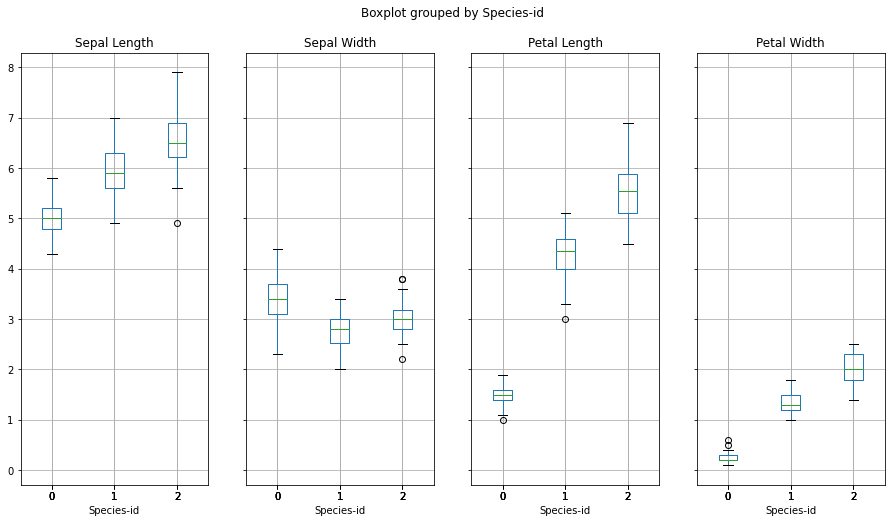

In [5]:
iris_features = tuple(df_iris.columns[:4].values)
df_iris.boxplot(column=iris_features, by='Species-id', figsize=(15,8), layout=(1,4));

## Step 3 Cleaning the dataset
Since this dataset is already cleaned, we don't do anything here

## Step 4 Preprocesssing: Selecting features (and scaling them)
We will select two features and scale each feature linearly with standard scaler.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

Iris types: [0 1 2]
The length of X_iris: 149


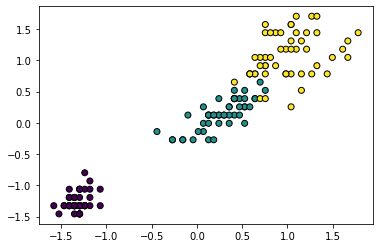

In [7]:
# Define X_iris and y_iris
X_iris = df_iris[['Petal Length', 'Petal Width']]
y_iris = df_iris['Species-id']
print('Iris types:', df_iris['Species-id'].unique())

# Normalize
scaler_iris = StandardScaler().fit(X_iris)
X_iris = scaler_iris.transform(X_iris)
print('The length of X_iris: {}'.format(len(X_iris)))

plt.scatter(X_iris[:,0], X_iris[:,1], edgecolors='k', c=y_iris)

## Step 5 Preprocessing: Dividing your data into a training and test set

Let’s use the symbol X for the scaled 2D input feature array, and the symbol y for the 1D output label vector.
We will split the data into a train set and test set.

#### Iris dataset

Train shape: (111, 2) (111,)
Test shape: (38, 2) (38,)


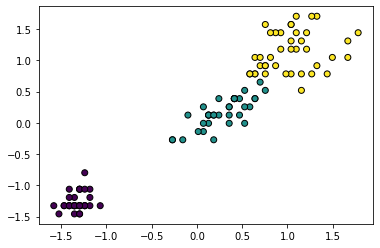

In [8]:
# Split in train and test sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.25,random_state=0)
print('Train shape:', X_train_iris.shape, y_train_iris.shape)
print('Test shape:', X_test_iris.shape, y_test_iris.shape)

plt.scatter(X_train_iris[:,0], X_train_iris[:,1], edgecolors='k', c=y_train_iris)

## Step 6 Modeling: Training your Machine learning algorithm

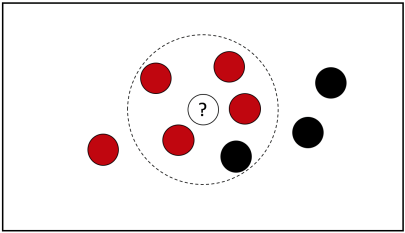
<i>Figure 1: A data point is classified by majority votes from its 5 nearest neighbors. Here, the unknown point would be classified as red, since 4 out of 5 neighbors are red.</i>

The library sklearn contains an implementation of the NearestNeighbors algorithm:

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
## we create an instance of Neighbours Classifier and fit the data.
clf_iris = KNeighborsClassifier(5)
clf_iris.fit(X_train_iris, y_train_iris)

KNeighborsClassifier()

## Step 7 Evaluation: Result of learning - accuracy
The accuracy of your KNN algorithm is based on the correct predicted labels of the hold-out test set.

#### Iris dataset

In [11]:
#Evaluate performance (with test set)
print('Number of test points: ',X_test_iris.size)
y_pred_iris = clf_iris.predict(X_test_iris)

Number of test points:  76


Accuracy score for the Iris Dataset:

In [12]:
metrics.accuracy_score(y_test_iris, y_pred_iris)

0.8947368421052632

In [13]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test_iris, y_pred_iris, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        14
     class 1       0.81      0.93      0.87        14
     class 2       0.88      0.70      0.78        10

    accuracy                           0.89        38
   macro avg       0.90      0.88      0.88        38
weighted avg       0.90      0.89      0.89        38



## Now it is your turn

### Select another two features. Scale them with standard scaler. Plot the features with box plot. What do you observe?

Iris types: [0 1 2]
The length of X_iris: 149


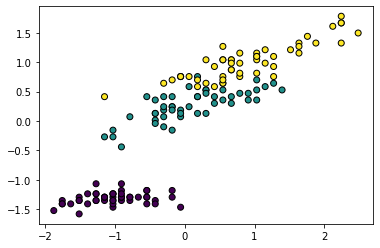

In [14]:
X_iris = df_iris[['Sepal Length', 'Petal Length']]
y_iris = df_iris['Species-id']
print('Iris types:', df_iris['Species-id'].unique())

# Normalize
scaler_iris = StandardScaler().fit(X_iris)
X_iris = scaler_iris.transform(X_iris)
print('The length of X_iris: {}'.format(len(X_iris)))

plt.scatter(X_iris[:,0], X_iris[:,1], edgecolors='k', c=y_iris)

### When I put my data into a scatterplot I can still see that class 0 is still apart from the other 2 classes, however class 1 and 2 are even more mixed with each other. 

### Divide your data into training and test data. Train your data with k nearst neighbour algorithm. Define k=5, and compare the accuracy with what you have obtained before. What do you observe?

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         1
     class 1       0.75      1.00      0.86         3
     class 2       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.92      0.92      0.90         8
weighted avg       0.91      0.88      0.88         8



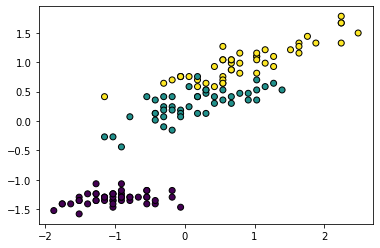

In [26]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.05,random_state=0)
plt.scatter(X_train_iris[:,0], X_train_iris[:,1], edgecolors='k', c=y_train_iris)

clf_iris = KNeighborsClassifier(5)
clf_iris.fit(X_train_iris, y_train_iris)

y_pred_iris = clf_iris.predict(X_test_iris)

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test_iris, y_pred_iris, target_names=target_names))

### When I change my target valuables to sepal lenght and petal lenght I observe that in comparison to the speal lenght and sepal width I have a higher accuracy score in classifying class 0 and class 2 but the algorithm still struggules to classify class 1.

### Try another k value and compare the accuracy. Compare your results with another student's. Are they the same? Why (not)?

In [16]:
clf_iris = KNeighborsClassifier(11)
clf_iris.fit(X_train_iris, y_train_iris)

y_pred_iris = clf_iris.predict(X_test_iris)

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test_iris, y_pred_iris, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         1
     class 1       1.00      1.00      1.00         3
     class 2       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



### If i increase the number of neighbours that the algoirthm classifies by then my accuracy score increases to 100%. The same can be done to the target variables of sepal lenght and sepal width and the accuracy can become 100% as well


### Optional: Find another data set from the same resource http://archive.ics.uci.edu/ml/machine-learning-databases and try out.